In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [3]:
%cd C:\Users\ANIK\Desktop\loan

C:\Users\ANIK\Desktop\loan


In [4]:
#Read csv file wth loan data
loan = pd.read_csv("loan.csv") 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#Lets check the null values in each column:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
# Check for column-wise null percentages here
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [7]:
loan=loan.drop_duplicates(keep='first', inplace=False)
loan.info()
#We could see length before dropping duplicate and after dropping duplicates is same. So we can confirm that there are no duplicate present.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.9+ MB


In [8]:
#There are no duplicates in id, hence id column can be used as primary.
len(loan.id.unique())

39717

In [9]:
# removing all columns with NA values asthis doesnt help in analysis.
loan=loan.dropna(axis=1,how='all')

In [10]:
#We still can see some columns have null values more than 90% so next lets remove them.
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
p=round(100*(loan.isnull().sum()/len(loan.index)),2)
Na=pd.DataFrame({'Loan_Attributes':p.index, 'Null_percent':p.values})
Na['Null_percent'] = Na['Null_percent'].astype(float)
Na=Na[Na['Null_percent'] <90]  #Removing columns haing Na values more than 90%.
Na.head()

,Loan_Attributes,Null_percent
0,id,0.0
1,member_id,0.0
2,loan_amnt,0.0
3,funded_amnt,0.0
4,funded_amnt_inv,0.0


In [12]:
loan=loan[Na.Loan_Attributes]
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [14]:
#Find columns which have unique value(same value for all rows) and remove them as they are not usefull for analysis.
loan= loan.loc[:,loan.nunique()!=1] 
loan.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal 

In [15]:
#After removing required columns lets look into null values and data types.
# if less null values then remove the rows with null values.
# Also there is need for updating the datatypes of some columns.
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 46 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
url                        39717 non-null object
desc      

In [16]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
open_acc                    0.00
pub_rec                     0.00
revol_bal 

In [17]:
 #Changing values of term coulmn. Example term value "36 months" is changed to 36
loan['term']=loan['term'].str.split(expand=True)[0].astype(int)

# Changin name of column term to term_months
loan.rename(columns={'term': 'term_in_months'}, inplace=True)

In [18]:
#Remove percentages and loading them as floats as they will be used for analysis.
loan['int_rate']=loan['int_rate'].str.split('%',expand=True)[0].astype(float)
# Changin name of column int_rate to int_rate_%
loan.rename(columns={'int_rate': 'int_rate_%'}, inplace=True)

In [19]:
#Dropping rows with Null values in emp_length column as total null % is less than 5%
loan=loan[loan['emp_length'].isnull()==False]

In [20]:
#Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

loan['emp_length']=loan['emp_length'].str.split(" ",expand=True)[0]
loan['emp_length']=loan['emp_length'].apply(lambda x:"10"  if x=='10+' else ( '0' if x=='<' else x ))

# Changin name of column emp_length to emp_length_in_years
loan.rename(columns={'emp_length': 'emp_length_in_years'}, inplace=True)


In [21]:
#Changing datatype of emp_length from String to int (no of years)
loan['emp_length_in_years']=loan['emp_length_in_years'].astype(int)

In [22]:
loan['emp_length_in_years'].head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length_in_years, dtype: int32

In [23]:
#Changing annual_inc from str to float
loan['annual_inc']=loan['annual_inc'].astype(float)

# Changin name of column emp_length to emp_length_in_years
loan.rename(columns={'emp_length': 'emp_length_in_years'}, inplace=True)

In [24]:
#Updating datatype of issue_d from str to datetime format

#As per pandas guide It is expected that in a future version of IEEE Std 1003.1-2001 the default century inferred from a 2-digit year will change.
#Hence if the year is 9 we are changing this to 09
loan['issue_d']=loan['issue_d'].apply(lambda x : x if x[3]=='-' else '0'+x )



In [25]:
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime (x, '%b-%y'))

#loan['issue_d'] =  pd.to_datetime(loan['issue_d'], format='%y-%b')

In [26]:
loan['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [27]:
len(loan['issue_d'].unique())

55

In [28]:
#Debt to income ratio should be float but not str. So changing the data type:
loan['dti']=loan['dti'].astype(float)

In [29]:
len(loan['inq_last_6mths'].unique())

9

In [30]:
#inquiry can be used as a categorical version hence changing the data type to str which make it categorical.
loan['inq_last_6mths']=loan['inq_last_6mths'].astype(str)

In [31]:
#pub_rec can be used as a categorical version hence changing the data type to str which make it categorical.
loan['pub_rec']=loan['pub_rec'].astype(str)

# Changin name of pub_rec to No_derog_pub_rec(Number of derogatory public records)
loan.rename(columns={'emp_length': 'No_derog_pub_rec'}, inplace=True)

In [32]:
loan['revol_util']=loan['revol_util'].str.split('%',expand=True)[0].astype(float)

In [33]:
#pub_rec can be used as a categorical version hence changing the data type to str which make it categorical.
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].astype(str)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate_%,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [34]:
#If you see in columns like revol_util,last_pymnt_d,last_credit_pull_d have <5% null values, so drop the rows which have these values as null
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term_in_months              0.00
int_rate_%                  0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   3.73
emp_length_in_years         0.00
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.34
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.57
open_acc                    0.00
pub_rec                     0.00
revol_bal 

In [35]:
#Dropping rows having null vaues in revol_util,last_pymnt_d,last_credit_pull_d columns

loan=loan[loan['revol_util'].isnull()==False]
loan=loan[loan['last_pymnt_d'].isnull()==False]
loan=loan[loan['last_credit_pull_d'].isnull()==False]

In [36]:
#Changing last_pymnt_d from str to datetime format
loan['last_pymnt_d']=loan['last_pymnt_d'].apply(lambda x : x if x[3]=='-' else '0'+x )
loan['last_pymnt_d'] = loan['last_pymnt_d'].apply(lambda x: datetime.strptime (x, '%b-%y'))

In [37]:
#Changing last_credit_pull_d from str to datetime format
loan['last_credit_pull_d']=loan['last_credit_pull_d'].apply(lambda x : x if x[3]=='-' else '0'+x )
loan['last_credit_pull_d'] = loan['last_credit_pull_d'].apply(lambda x: datetime.strptime (x, '%b-%y'))

In [38]:
#Changing last_pymnt_d from str to datetime format
#loan['earliest_cr_line']=loan['earliest_cr_line'].apply(lambda x : x if x[0].isnumeric() else x[4:]+'-'+x[0:3] )
loan['earliest_cr_line']=loan['earliest_cr_line'].apply(lambda x : x if x[3]=='-' else '0'+x )
loan['earliest_cr_line']=loan['earliest_cr_line'].apply(lambda x: datetime.strptime (x, '%b-%y'))
#loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: datetime.strptime (x, '%y-%b'))

In [39]:
loan['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

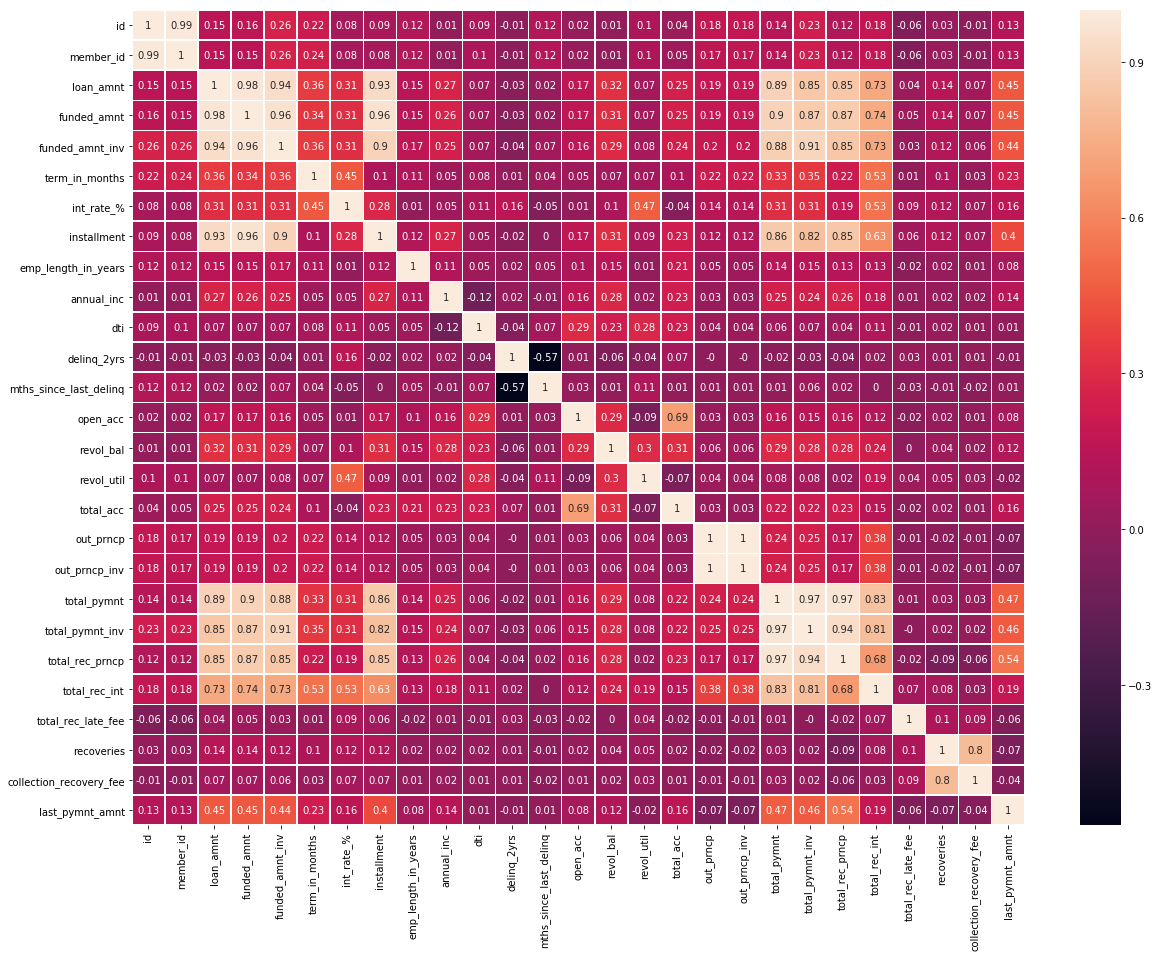

In [40]:
corr = round(loan.corr(),2)
fig = plt.figure(figsize=(20,15))
sns.heatmap(corr,linewidths=0.5, annot=True)
plt.show()

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38531 entries, 0 to 39716
Data columns (total 46 columns):
id                         38531 non-null int64
member_id                  38531 non-null int64
loan_amnt                  38531 non-null int64
funded_amnt                38531 non-null int64
funded_amnt_inv            38531 non-null float64
term_in_months             38531 non-null int32
int_rate_%                 38531 non-null float64
installment                38531 non-null float64
grade                      38531 non-null object
sub_grade                  38531 non-null object
emp_title                  37096 non-null object
emp_length_in_years        38531 non-null int32
home_ownership             38531 non-null object
annual_inc                 38531 non-null float64
verification_status        38531 non-null object
issue_d                    38531 non-null datetime64[ns]
loan_status                38531 non-null object
url                        38531 non-null object
des

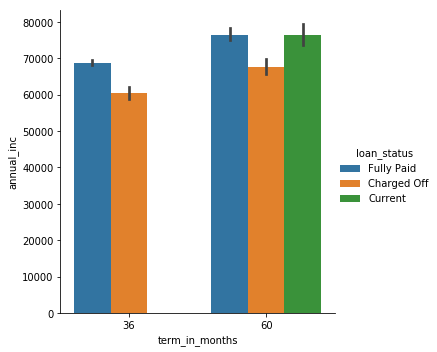

In [42]:
sns.catplot(x="term_in_months", y="annual_inc", hue="loan_status", data=loan, kind="bar")

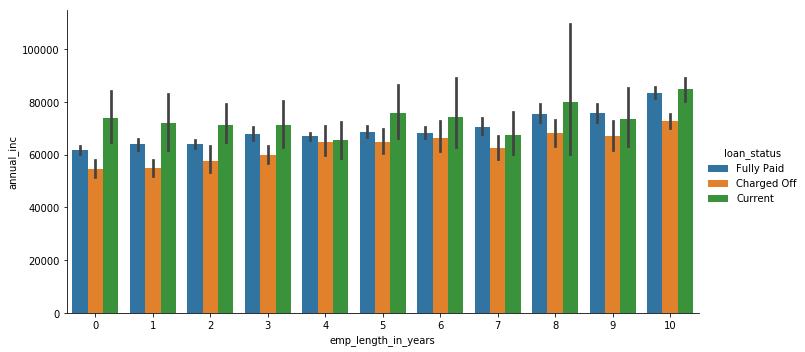

In [43]:
sns.catplot(x="emp_length_in_years", y="annual_inc", hue="loan_status", data=loan, kind="bar", aspect = 2)

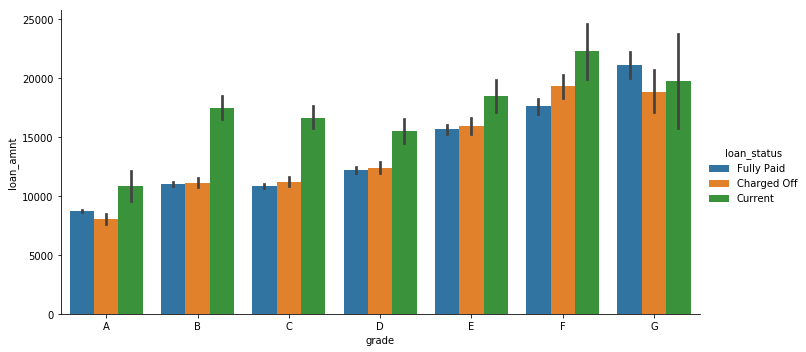

In [46]:
loan['grade']=loan['grade'].astype('category')
sns.catplot(x="grade", y="loan_amnt", hue="loan_status", data=loan, kind="bar", aspect = 2)

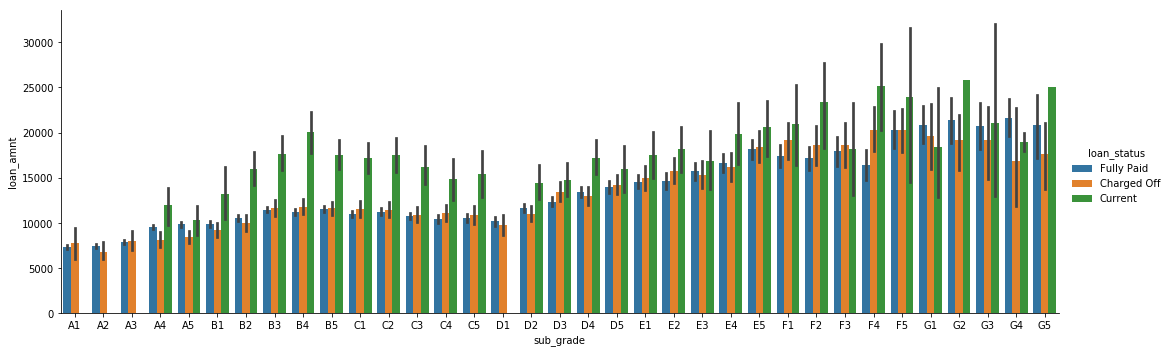

In [47]:
loan['sub_grade']=loan['sub_grade'].astype('category')
sns.catplot(x="sub_grade", y="loan_amnt", hue="loan_status", data=loan, kind="bar", aspect = 3)